# Solving Non Linear Problems

In lesson 04, you were able to figure out how to solve a basic Linear Regression problem with a simple NN. In this lesson, I am going to introduce you to **Activation functions**. You are also going to create a NN with a hidden layer.

> What is the purpose of an activation Function?

Activation Functions allow your NN to model non linear problems. All of your NNs in the previous lessons have NOT had an activation function and will not do well with non linear datasets.

>What are some of the common activation functions?

* Sigmoid
* Tanh
* ReLU (most popular)

In [200]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.3 | packaged by conda-forge | (default, Feb 10 2017, 07:09:50) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
Tensorflow version 1.0.1
Pandas version 0.19.2
Numpy version 1.12.0


# Function to model
y = a * x^2 + b * x + c  

In [201]:
## preparing the data

# Let's generate 1000 random samples
np.random.seed(41)
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000*0.15)

# test and train data
test_x = pool[:sample]
train_x = pool[sample:]

print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [202]:
df = pd.DataFrame({"x":train_x[:,0], "y":train_y[:,0]})
df.head()

,x,y
0,0.297006,6.067443
1,0.016343,5.049562
2,0.875014,9.156341
3,0.560268,7.308606
4,0.672104,7.919758


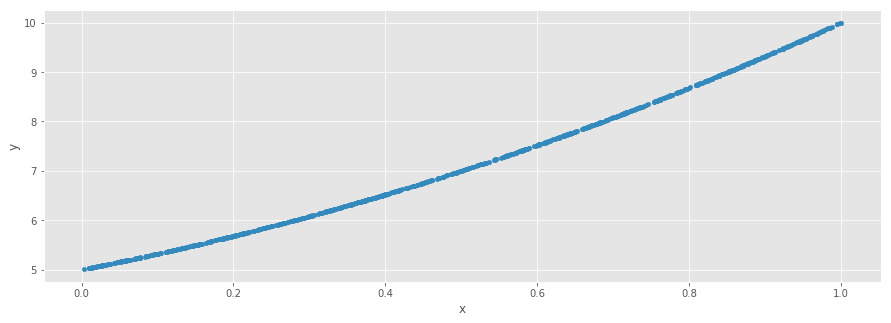

In [203]:
df.plot.scatter(x="x", y="y", figsize=(15,5))

# Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's **matrix multiplication function (matmul)** as shown below.

> The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...
> shape = [how many data points do you have, how many features does each data point have]

For this lesson since we are doing a simple regression, we only have one feature (x). We use the **None** keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [204]:
# you can adjust the number of neurons in the hidden layer here
hidden_size = 1

# placeholders
x = tf.placeholder(tf.float32, shape=[None, 1], name='x')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y')

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


In [205]:
seed = 42

# create your first hidden layer!
# tf.truncated_normal([how many samples do you have, size of output layer])
W1 = tf.Variable(tf.truncated_normal([1, hidden_size], mean=0.1, stddev=0.01, seed=seed), name="w1")

# tf.truncated_normal([size of output layer])
b1 = tf.Variable(tf.zeros([hidden_size]), name="b1")

# shape of h1 = [size of your samples, size of output layer]
h1 = tf.nn.relu(tf.matmul(x, W1) + b1, name="h1")

print("shape of hidden layer:")
print(h1.get_shape())

shape of hidden layer:
(?, 1)


In [206]:
# Output Layer
W = tf.Variable(tf.truncated_normal([hidden_size, 1], mean=0.1, stddev=0.01, seed=seed), name="w")
b = tf.Variable(tf.zeros([1]), name="b")

# note that the input comes from our hidden layer h1
pred = tf.nn.relu(tf.matmul(h1, W) + b)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [207]:
loss = tf.reduce_mean(tf.square(pred-y))
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)


# How Good is Your model?
Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [208]:
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training Time!
The best score I was able to obtain was a ~90% accuracy using a LR of 0.09 and iterating 250 times. I tried different learning rates and iterations but I was having a hard time getting past the 89 mark.

In [209]:
init = tf.global_variables_initializer()
t=[]

with tf.Session() as sess:
    sess.run(init)
    #train the model
    train_data = {x:train_x, y:train_y}
    test_data = {x:test_x, y:test_y}
    print(W1.eval(), W.eval())
    for step in range(1000):
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)
        if step%50==0:
            acc = sess.run(accuracy, feed_dict=train_data)
            t.append((step, train_loss))
            print("Training loss at step %d: %f  accuracy: %f" % (step, train_loss, acc))     
    
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    print(W1.eval(), W.eval())

[[ 0.09719225]] [[ 0.09719225]]
Training loss at step 0: 53.533848  accuracy: 0.000000
Training loss at step 50: 0.022636  accuracy: 0.864706
Training loss at step 100: 0.020757  accuracy: 0.874118
Training loss at step 150: 0.020757  accuracy: 0.874118
Training loss at step 200: 0.020757  accuracy: 0.874118
Training loss at step 250: 0.020757  accuracy: 0.874118
Training loss at step 300: 0.020757  accuracy: 0.874118
Training loss at step 350: 0.020757  accuracy: 0.874118
Training loss at step 400: 0.020757  accuracy: 0.874118
Training loss at step 450: 0.020757  accuracy: 0.874118
Training loss at step 500: 0.020757  accuracy: 0.874118
Training loss at step 550: 0.020757  accuracy: 0.874118
Training loss at step 600: 0.020757  accuracy: 0.874118
Training loss at step 650: 0.020757  accuracy: 0.874118
Training loss at step 700: 0.020757  accuracy: 0.874118
Training loss at step 750: 0.020757  accuracy: 0.874118
Training loss at step 800: 0.020757  accuracy: 0.874118
Training loss at s

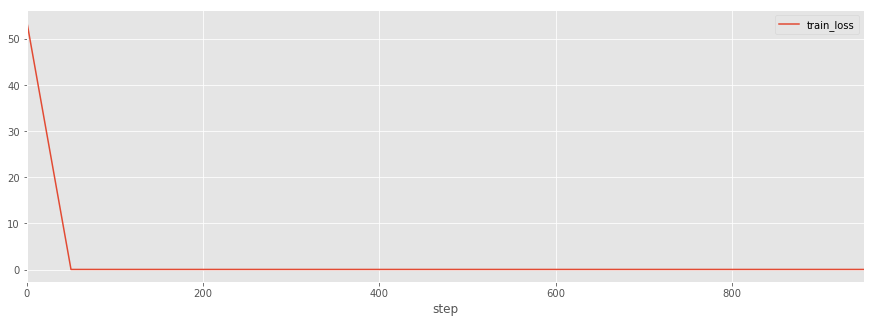

In [212]:
df_loss = pd.DataFrame(t, columns=['step', 'train_loss']) 
df_loss.plot(x='step', y='train_loss', figsize=(15,5));